In [35]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

In [36]:
physical_devices = tf.config.list_physical_devices('GPU')
print("GPU devices available: ", physical_devices)

# 確認 TensorFlow 是否正在使用 GPU
if physical_devices:
    print("TensorFlow is using GPU.")
else:
    print("TensorFlow is not using GPU.")

GPU devices available:  []
TensorFlow is not using GPU.


In [37]:
data = pd.read_csv("kc_house_data.csv")
# 顯示dataset的形狀，共21613比資料，每一比資料有21種不同資訊。
data.shape

(21613, 21)

In [38]:
# 將顯示列數設定為25，不然會有部份資料無法顯示
pd.options.display.max_columns = 25
# head 會顯示前五行的數據
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [39]:
# 將date日期拆為年、月和日並轉成數值
data['year'] = pd.to_numeric(data['date'].str.slice(0, 4))
data['month'] = pd.to_numeric(data['date'].str.slice(4, 6))
data['day'] = pd.to_numeric(data['date'].str.slice(6, 8))

# 刪除沒有用的數據，inplace則是將更新後的資料存回原本的地方
data.drop(['id'], axis="columns", inplace=True)
data.drop(['date'], axis="columns", inplace=True)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [40]:
data_num = data.shape[0]
# 取得一筆與data數量相同的亂數索引，主要目的是用於打散資料
indexes = np.random.permutation(data_num)
# 並將亂數索引值分為Train、validation和test分為，這裡的劃分比例為6:2:2
train_indexes = indexes[:int(data_num *0.6)]
val_indexes = indexes[int(data_num *0.6):int(data_num *0.8)]
test_indexes = indexes[int(data_num *0.8):]
# 透過索引值從data取出訓練資料、驗證資料和測試資料
train_data = data.loc[train_indexes]
val_data = data.loc[val_indexes]
test_data = data.loc[test_indexes]

In [41]:
train_validation_data = pd.concat([train_data, val_data])
mean = train_validation_data.mean()
std = train_validation_data.std()

train_data = (train_data - mean) / std
val_data = (val_data - mean) / std

In [42]:
x_train = np.array(train_data.drop('price', axis='columns'))
y_train = np.array(train_data['price'])
x_val = np.array(val_data.drop('price', axis='columns'))
y_val = np.array(val_data['price'])

In [43]:
# 建立一個Sequential型態的model
model = keras.Sequential(name='model-1')
# 第1層全連接層設為64個unit，將輸入形狀設定為(21, )，而實際上我們輸入的數據形狀為(batch_size, 21)
model.add(layers.Dense(64, activation='relu', input_shape=(21,)))
# 第2層全連接層設為64個unit
model.add(layers.Dense(64, activation='relu'))
# 最後一層全連接層設為1個unit
model.add(layers.Dense(1))
# 顯示網路模型架構
model.summary()

c:\Users\user\.conda\envs\ai_maritime\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,633 (22.00 KB)

 Trainable params: 5,633 (22.00 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(keras.optimizers.Adam(0.001),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

In [45]:
model_dir = 'lab2-logs/models/'
os.makedirs(model_dir, exist_ok=True)


In [46]:
# TensorBoard回調函數會幫忙紀錄訓練資訊，並存成TensorBoard的紀錄檔
log_dir = os.path.join('lab2-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# ModelCheckpoint回調函數幫忙儲存網路模型，可以設定只儲存最好的模型，「monitor」表示被監測的數據，「mode」min則代表監測數據越小越好。
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.keras', 
                                        monitor='val_mean_absolute_error', 
                                        save_best_only=True, 
                                        mode='min')

In [47]:
history = model.fit(x_train, y_train,  # 傳入訓練數據
               batch_size=64,  # 批次大小設為64
               epochs=300,  # 整個dataset訓練300遍
               validation_data=(x_val, y_val),  # 驗證數據
               callbacks=[model_cbk, model_mckp])  # Tensorboard回調函數紀錄訓練過程，ModelCheckpoint回調函數儲存最好的模型

Epoch 1/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5408 - mean_absolute_error: 0.4111 - val_loss: 0.2549 - val_mean_absolute_error: 0.2958
Epoch 2/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1986 - mean_absolute_error: 0.2789 - val_loss: 0.2254 - val_mean_absolute_error: 0.2752
Epoch 3/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1640 - mean_absolute_error: 0.2591 - val_loss: 0.2023 - val_mean_absolute_error: 0.2605
Epoch 4/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1502 - mean_absolute_error: 0.2412 - val_loss: 0.1868 - val_mean_absolute_error: 0.2553
Epoch 5/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1514 - mean_absolute_error: 0.2375 - val_loss: 0.1726 - val_mean_absolute_error: 0.2352
Epoch 6/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1296 - mean_absolute_error: 0.2234 - val_loss: 0.1703 - val_mean_absolute_error: 0.2333
Epoch 7/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1254 - mean_absolute_error: 0.2

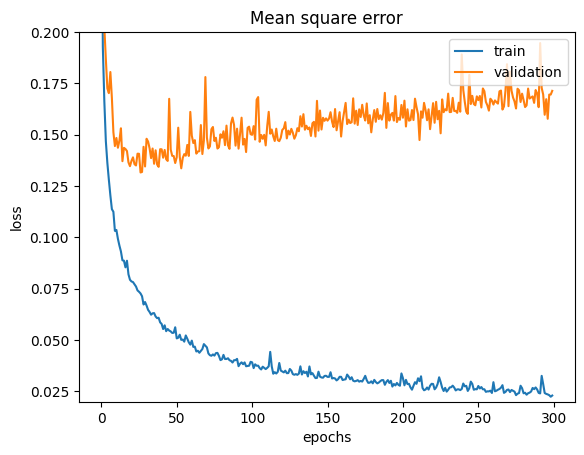

In [48]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0.02, 0.2)
plt.title('Mean square error')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

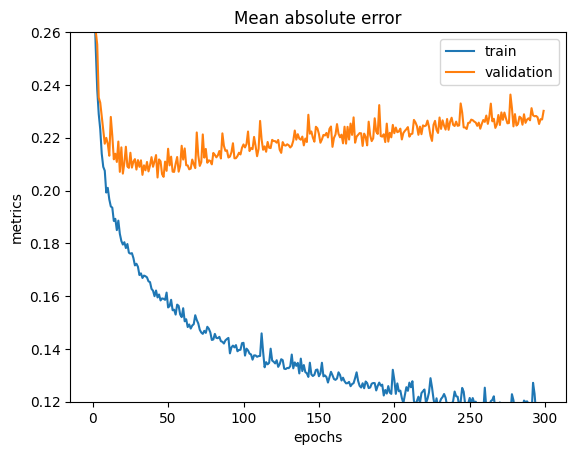

In [49]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.ylim(0.12, 0.26)
plt.title('Mean absolute error')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='upper right')

In [50]:
# 載入模型
model = keras.models.load_model('lab2-logs/models/Best-model-1.keras', compile=False)
model.compile(keras.optimizers.Adam(0.001),
              loss=keras.losses.MeanSquaredError(reduction='sum_over_batch_size'),
              metrics=[keras.metrics.MeanAbsoluteError()])
#model = keras.models.load_model('lab2-logs/models/Best-model-1.h5')
# 先將房屋價格取出
y_test = np.array(test_data['price'])
# 標準化數據
test_data = (test_data - mean) / std
# 將輸入數據存成Numpy 格式
x_test = np.array(test_data.drop('price', axis='columns'))
# 預測測試數據
y_pred = model.predict(x_test)
# 將預測結果轉換回來(因為訓練時的訓練目標也有經過標準化)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
# 計算平均的誤差百分比
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
# 顯示誤差百分比
print("Model_1 Percentage Error: {:.2f}%".format(percentage_error))

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model_1 Percentage Error: 13.80%


In [51]:
# 這行指令可以幫助我們直接在jupyter notebook上顯示TensorBoard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [52]:
%tensorboard --port 9531 --logdir lab2-logs

Reusing TensorBoard on port 9531 (pid 13616), started 0:02:34 ago. (Use '!kill 13616' to kill it.)

In [53]:
model_2 = keras.Sequential(name='model-2')
model_2.add(layers.Dense(16, activation='relu', input_shape=(21,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))

model_2.compile(keras.optimizers.Adam(0.001),
                loss=keras.losses.MeanSquaredError(),
                metrics=[keras.metrics.MeanAbsoluteError()])

log_dir = os.path.join('lab2-logs', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.keras', 
                                             monitor='val_mean_absolute_error', 
                                             save_best_only=True, 
                                             mode='min')
model_2.fit(x_train, y_train, 
            batch_size=64 ,
            epochs=300, 
            validation_data=(x_val, y_val), 
            callbacks=[model_cbk, model_mckp])

Epoch 1/300


c:\Users\user\.conda\envs\ai_maritime\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7960 - mean_absolute_error: 0.5800 - val_loss: 0.3643 - val_mean_absolute_error: 0.3554
Epoch 2/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2781 - mean_absolute_error: 0.3333 - val_loss: 0.2943 - val_mean_absolute_error: 0.3120
Epoch 3/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2248 - mean_absolute_error: 0.2999 - val_loss: 0.2694 - val_mean_absolute_error: 0.3054
Epoch 4/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2107 - mean_absolute_error: 0.2860 - val_loss: 0.2542 - val_mean_absolute_error: 0.2928
Epoch 5/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1936 - mean_absolute_error: 0.2787 - val_loss: 0.2538 - val_mean_absolute_error: 0.2833
Epoch 6/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1949 - mean_absolute_error: 0.2732 - val_loss: 0.2384 - val_mean_absolute_error: 0.2873
Epoch 7/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1814 - mean_absolute_error: 0.2687 - val_lo

L! L2

In [55]:
model_3 = keras.Sequential(name='model-3')
model_3.add(layers.Dense(64, 
                         kernel_regularizer=keras.regularizers.l2(0.001), 
                         activation='relu', input_shape=(21,)))
model_3.add(layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model_3.add(layers.Dense(1))

model_3.compile(keras.optimizers.Adam(0.001),
                loss=keras.losses.MeanSquaredError(),
                metrics=[keras.metrics.MeanAbsoluteError()])

log_dir = os.path.join('lab2-logs', 'model-3')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-3.keras', 
                                             monitor='val_mean_absolute_error', 
                                             save_best_only=True, 
                                             mode='min')
model_3.fit(x_train, y_train, 
            batch_size=64 ,
            epochs=300, 
            validation_data=(x_val, y_val), 
            callbacks=[model_cbk, model_mckp])

Epoch 1/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6866 - mean_absolute_error: 0.4388 - val_loss: 0.3588 - val_mean_absolute_error: 0.2966
Epoch 2/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2752 - mean_absolute_error: 0.2786 - val_loss: 0.3098 - val_mean_absolute_error: 0.2726
Epoch 3/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2787 - mean_absolute_error: 0.2677 - val_loss: 0.2898 - val_mean_absolute_error: 0.2625
Epoch 4/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2279 - mean_absolute_error: 0.2438 - val_loss: 0.2707 - val_mean_absolute_error: 0.2594
Epoch 5/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2127 - mean_absolute_error: 0.2354 - val_loss: 0.2663 - val_mean_absolute_error: 0.2564
Epoch 6/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2002 - mean_absolute_error: 0.2300 - val_loss: 0.2363 - val_mean_absolute_error: 0.2407
Epoch 7/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1937 - mean_absolute_error: 0.2